## Deep Learning - Assignment 1

### A.1) Handcoded Neural Network using only Python

### Question 1

Note : If you see my code in other students assignments, this here is the source!



#### Note : My notation is different from the one used in the lecture. Elements of activated vectors are denoted by $A^{l}_{i}$, Linears are called $Z^{l}_{i}$. 



$A_j = P(y=j | Z)$ is modeled by the softmax $A(Z) : \mathbb{R}^{N} \to \mathbb{R}^{N}$.

yielding quasi probabilities

$$
A_{j}=\frac{e^{Z_{j}}}{\sum_{k=1}^{N} e^{Z_{k}}} \quad \forall j \in 1 . . N
$$

Gradient must therefore be $J \in \mathbb{R}^{N\times N}$. The partial derivates will look like the sigmoid derivatives, but since we incorporate all elements of $Z$ we will have to specify $(i, j)$ to get an general expression of the derivatives.


$$
J_{j, i}=\frac{\partial A_{i}}{\partial Z_{j}}=\frac{\partial \frac{e^{Z_{i}}}{\sum_{k=1}^{N} e^{Z_{k}}}}{\partial Z_{j}}
$$

###  1.) $i=j$ 

$$
\Sigma \gets \sum_{k=1}^{N} e^{Z_{k}}
$$


$$
\begin{aligned}
\frac{\partial \frac{e^{Z_{i}}}{\sum_{k=1}^{N} e^{Z_{k}}}}{\partial Z_{j}} &=\frac{e^{Z_{i}} \Sigma-e^{Z_{j}} e^{Z_{i}}}{\Sigma^{2}} \\
&=\frac{e^{Z_{i}}}{\Sigma} \frac{\Sigma-e^{Z_{j}}}{\Sigma} \\
&=S_{i}\left(1-A_{j}\right)
\end{aligned}
$$
### 2.) $i \neq j$

$$
\begin{aligned}
\frac{\partial \frac{e^{Z_{i}}}{\sum_{k=1}^{N} e^{Z_{k}}}}{\partial Z_{j}} &=\frac{0-e^{Z_{j}} e^{Z_{i}}}{\Sigma^{2}} \\
&=-\frac{e^{Z_{j}}}{\Sigma} \frac{e^{Z_{i}}}{\Sigma} \\
&=-A_{j} A_{i}
\end{aligned}
$$
yields
$$
J_{j,i} =\left\{\begin{array}{cc}
A_{i}\left(1-A_{j}\right) & i=j \\
-A_{j} A_{i} & i \neq j
\end{array}\right.
$$

### Objective

We model the similarity between the target distribution $T$ and our modeled distribution $A$ by :

$$
\mathcal{L}(T, A)=-\sum_{i=1}^{N} T_{i} \cdot \log \left(A_{i}\right)
$$

It is immediately obvious that the gradient must be $J \in \mathbb{R}^{N}$ and only $i$ for which $T_i = 1$ will be non-zero in the jacobian. For the element where $T_i = 1$, the entry (i.e. partial derivative) must be $- \frac{1}{A_i}$.

$$
J_{i} =\left\{\begin{array}{cc}
- \frac{1}{A_i} & T_i=1 \\
0 & \text{else}
\end{array}\right.
$$

### Question 2
For this specific scalar derivation I will use the lectures notation again to avoid cnfusion. After that I will switch back to the proper tensor notation

$$
\frac{\partial l}{\partial o_{i}} = \partial\frac{-log(\frac{\exp o_i}{\sum_j\exp o_j})}{\partial o_i} = \partial\frac{-o_i + log(\sum_j\exp o_j)}{\partial o_i} = -\frac{\partial o_i}{\partial o_i} + \frac{\exp o_i}{\sum_j\exp o_j} = y_i - \frac{\partial o_i}{\partial o_i}  = y_i - \mathbb{1}(y=i) 
$$


Its not necessary because we can just use the chain rule

$$
\frac{\partial L}{\partial o_i} = \frac{\partial L}{\partial y_i} \frac{\partial y_i}{\partial o_i}
$$

and with the already calculated derivatives we get:

$$
= -\frac{1}{y_i}y_i (1-y_i) = -(1-y_i) = y_i -1
$$

### Question 3

### Note : Code for my functions can be found in *./code/handcoded/*

Before I start, I define the dot product of two objects, because I just dont want to do nested for loops each time Im multiplying two objects. Additionally, I define a naive list addition function :

In [1]:
from code.handcoded.algebra import dot, add

Next, I define a function to transpose the objects and inspect its shape:

In [2]:
from code.handcoded.algebra import shape, transpose

Now I define my functions that we need:

In [3]:
from code.handcoded.functional import sigmoid, softmax, cross_entropy

In [4]:
X = [[1., -1.]]
W1 = [[1., 1., 1.], [-1., -1., -1.]]
W2 = [[1., 1.], [-1., -1.], [-1., -1.]]
b1 = [[0.,0.,0.]]
b2 = [[0.,0.]]
T = [[1., 0.]]

### Forward

Since I defined the general object multiplication, the forward pass looks just like this:

In [5]:
# Linear
Z1 = add(dot(X, W1), b1)
# Activate
A1 = sigmoid(Z1)
# Linear
Z2 = add(dot(A1, W2), b2)
# Activate
A2 = [softmax(Z2)]

In [6]:
# Loss
L = cross_entropy(A2, T)
L

0.6931471805599453

### Backward

The jacobian of the loss is obviously just
$$
\frac{\partial L}{\partial A^{2}} = [ - \frac{1}{A^{2}_{1}}, 0 ] 
$$

In [7]:
dL_dA2 = [[-1/A2[0][_] if T[0][_]==1. else 0 for _ in range(len(T[0]))]]


For the softmax it must be $A_{i}\left(1-A_{j}\right)$ on the diagonal and elsewhere $-A_{j} A_{i}$. In this case we have 
$$
\left[\begin{array}{cc}
A^{2}_{1}\left(1-A^{2}_{1}\right) & -A^{2}_2 A^{2}_1 \\
-A^{2}_1 A^{2}_2 & A^{2}_{2}\left(1-A^{2}_{2}\right)
\end{array}\right] 
$$

In [8]:
dA2_dZ2 = [[None, None],[None, None]]
for i in range(2):
    for j in range(2):
        dA2_dZ2[i][j] = A2[0][i]*(1 - A2[0][i]) if i==j else - A2[0][i]*A2[0][j]

Now we aleady obtained 
$$
\frac{\partial L}{\partial Z^{2}} = \frac{\partial L}{\partial A^{2}} \frac{\partial A^{2}}{\partial Z^{2}}
$$

Thus 
$$
\frac{\partial L}{\partial b_2} = \frac{\partial L}{\partial A^{2}} \frac{\partial A^{2}}{\partial Z^{2}} \frac{\partial Z^{2}}{\partial b_2} = \frac{\partial L}{\partial b_2} = \frac{\partial L}{\partial A^{2}} \frac{\partial A^{2}}{\partial Z^{2}} 1
$$

In [9]:
dL_dZ2 = dL_db2 = dot(dL_dA2, dA2_dZ2) 

Now 

$$
\frac{\partial L}{\partial W_2} = \frac{\partial L}{\partial A^{2}} \frac{\partial A^{2}}{\partial Z^{2}} \frac{\partial Z^{2}}{\partial W_2}, \frac{\partial Z^{2}}{\partial W_2} = A^{{1}}
$$

Then equivalently :

In [10]:
dL_dW2 = transpose(dot(transpose(dL_dZ2), A1))

Now we need $\frac{\partial Z^{2}}{\partial A^{1}} = W_{2}^{T}$ and $\frac{\partial A^{1}}{\partial Z^{1}} = A^{1}(1-A^{1})$

In [11]:
dZ2_dA1 = transpose(W2)

In [12]:
dL_dA1 = dot(dL_dZ2, dZ2_dA1)

In [13]:
dA1_dZ1 = [[A1[0][_]*(1-A1[0][_]) for  _ in range(len(A1[0]))]]

In [14]:
dL_dZ1 = [[dL_dA1[0][_]*dA1_dZ1[0][_] for  _ in range(len(dA1_dZ1[0]))]]

$$
\frac{\partial L}{\partial b_1} = \frac{\partial L}{\partial A^{2}} \frac{\partial A^{2}}{\partial Z^{2}} \frac{\partial Z^{2}}{\partial A_1} \frac{\partial A^{1}}{\partial Z_1} \frac{\partial Z^{1}}{\partial b_1} 
$$

Thus, again $\frac{\partial L}{\partial b_1}= \frac{\partial L}{\partial Z_1}$


Equivalently

In [15]:
dL_db1 = dL_dZ1

$$
\frac{\partial L}{\partial W_1} = \frac{\partial L}{\partial A^{2}} \frac{\partial A^{2}}{\partial Z^{2}} \frac{\partial Z^{2}}{\partial A_1} \frac{\partial A^{1}}{\partial Z_1} \frac{\partial Z^{1}}{\partial W_1} 
$$

Obviously now $\frac{\partial Z^{1}}{\partial W_{1}} = X$

In [16]:
dZ1_dW1 = X

Finally

In [17]:
dL_dW1 = transpose(dot(transpose(dL_dZ1), dZ1_dW1))

### Gradients

In [18]:
dL_dW2

[[-0.44039853898894116, 0.44039853898894116],
 [-0.44039853898894116, 0.44039853898894116],
 [-0.44039853898894116, 0.44039853898894116]]

In [19]:
dL_db2

[[-0.5, 0.5]]

In [20]:
dL_dW1

[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0]]

In [21]:
dL_db1

[[0.0, 0.0, 0.0]]

### A.2) Handcoded Neural Network training Loop
### Question 4
I encapsulated the forward and backward pass into functions. I also initiliazed the weights using $U(0,1)$ and $0$ for the bias'. All code can be found at *./code/handcoded/neural_network*

In [22]:
from code.data import load_synth
from code.handcoded.neural_network import *
import pandas as pd # for plotting
from tqdm import tqdm # for progress bar

In [23]:
(xtrain, ytrain), (xval, yval), num_cls = load_synth()

100%|██████████| 100/100 [07:41<00:00,  4.62s/it]


<AxesSubplot:>

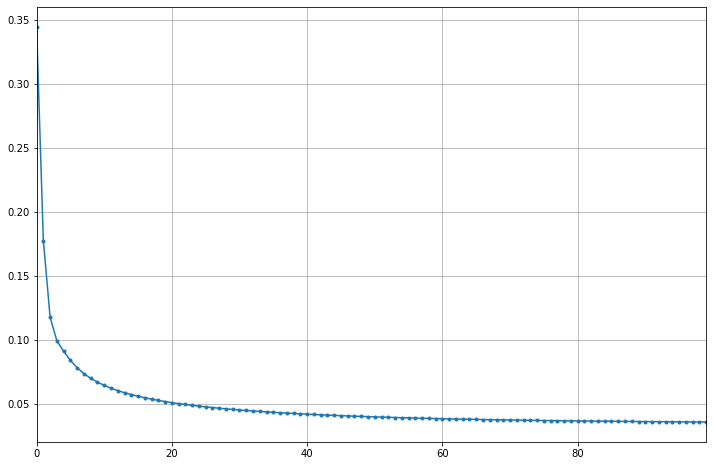

In [52]:
parameters = initialize_parameters()
W1, b1 = parameters["W1"],parameters["b1"]
W2, b2 = parameters["W2"],parameters["b2"]

epochs = {}
for epoch in tqdm(range(100)):
    epochs[epoch] = []
    for step in range(len(xtrain)):
        X = [xtrain[step].tolist()]
        Y = [ytrain[step]]
        Y += [0] if Y[0]==1 else [1]
        Y = [Y]
        A2, cache = forward_propagation(X, parameters)
        cost = compute_cost(A2, Y, parameters)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads, learning_rate=0.01)
        epochs[epoch] += [cost]
pd.DataFrame(epochs).mean(axis=0).plot(style=".-", grid=True,figsize=(12,8))

As one can see, the handcoded NN converges as expected. I am using 1-SGD without shuffling for training and a learning rate of 0.01.

## B.) Neural Network using Numpy

### Question 5 + 6

Note : Code can be inspected in *./code/vectorized/*

Implementing a neural network in numpy is trivial now because I already know all the required dot products for both the forward and backward pass. I didnt change any of the logic of the network, but I did some minor adjustments to the gradient expressions, without changing the actual derivates, just making the computations more efficient. For example since $A^{2}(Z^{2})$ is the softmax and $\mathcal{L}$ the cross entropy of $A^{2}$ and $T$, we can actually directly compute

$$
\begin{aligned}
\frac{\partial \mathcal{L}}{\partial \mathbf{Z}^{2}} &=\operatorname{softmax}(\mathbf{Z}^{2})-\mathbf{T} \\
&=A^{2}-\mathbf{T}
\end{aligned}
$$

as our gradient source. 

Another note is that I stabilized some of the functional operations by injecting small epsilons. By doing that we can avoid functional blowups and thus tiny gradients.


### MiniBatch SGD

Implementing batched versions of forward and backwards is very easy because you just need to add a batch dimension and after that take care of transpose-operation, because now we have to explicitly select the tranpose dimensions. Also, when updating the parameters I took the mean of the batch gradient for updating. Note that other options exist for sure. Other than that all operations should be equivalent to Single Batch GD.

In [1]:
from code.data import load_mnist
from code.vectorized.neural_network_vectorized import *
from tqdm import tqdm # for progress bar
from tqdm.notebook import tqdm_notebook
import pandas as pd # for plotting
import matplotlib.pyplot as plt  # for plotting

In [3]:
(xtrain, ytrain), (xval, yval), num_cls = load_mnist(False)

100%|██████████| 600/600 [02:22<00:00,  4.21it/s]


Text(0.5, 0, 'Epoch')

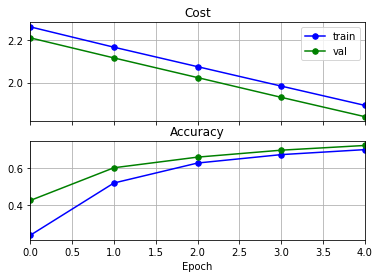

In [6]:
parameters = initialize_parameters()
W1, b1 = parameters["W1"],parameters["b1"]
W2, b2 = parameters["W2"],parameters["b2"]
costs = []
batch_size = 100
epochs = 5
N = xtrain.shape[0]
steps = int(N/batch_size)
xtrain_ = xtrain[:steps*batch_size]
ytrain_ = ytrain[:steps*batch_size]
epochs_ = {}
epochs_eval = {}
eval_batches = np.split(xval, int(xval.shape[0]/batch_size))
index = list(range(N))
train_acc = {}
val_acc = {}
for epoch in range(epochs):
    epochs_[epoch] = []
    epochs_eval[epoch] = []
    train_acc[epoch] = []
    val_acc[epoch] = []
    np.random.shuffle(index)
    batches = np.split(np.array(index), steps)
    for batch in tqdm(batches):
        x, y = xtrain_[batch], ytrain_[batch]
        X = x.reshape(batch_size,784,1)
        Y = np.zeros((batch_size,10,1))
        for i in range(len(y)):
            Y[i,y[i],:] = 1.
        A2, cache = forward_propagation(X, parameters, batched=True)
        cost = compute_cost_stable(A2, Y,batched=True)
        grads = backward_propagation(parameters, cache, X, Y,batched=True)
        parameters = update_parameters(parameters, grads, batched=True, learning_rate = 0.01)
        epochs_[epoch] += [cost]
        train_acc[epoch] += [np.where(A2.argmax(1) == Y.argmax(1))[0].shape[0] / Y.shape[0]]
    eval_batches = np.split(np.array(list(range(xval.shape[0]))), int(xval.shape[0]/batch_size))
    for ev in eval_batches:
        x, y = xval[ev], yval[ev]
        X = x.reshape(batch_size,784,1)
        Y = np.zeros((batch_size,10,1))
        for i in range(len(y)):
            Y[i,y[i],:] = 1.
        pred, ____ = forward_propagation(X, parameters, batched=True)
        cost_ = compute_cost_stable(pred, Y,batched=True)
        val_acc[epoch] += [np.where(pred.argmax(1) == Y.argmax(1))[0].shape[0] / Y.shape[0]]
        epochs_eval[epoch] += [cost_]
        
fig, axes = plt.subplots(nrows=2,ncols=1, sharex=True)
pd.DataFrame(epochs_).mean(axis=0).plot(style=".-",grid=True,ms=11,color="blue",ax=axes[0])
pd.DataFrame(epochs_eval).mean(axis=0).plot(style=".-",grid=True,ms=11,color="green",ax=axes[0])
pd.DataFrame(train_acc).mean(axis=0).plot(style=".-",grid=True,ms=11,color="blue",ax=axes[1])
pd.DataFrame(val_acc).mean(axis=0).plot(style=".-",grid=True,ms=11,color="green",ax=axes[1])
axes[0].legend(["train","val"])
axes[0].set_title("Cost")
axes[1].set_title("Accuracy")
axes[1].set_xlabel("Epoch")

Everything looks just fine. Showing 5 epochs, the validation loss is still lower than the training loss, which is expected because the model is being evaluated after each epoch, i.e. the model has already seen 55K data points before evaluation.

### Question 7

I evaluate the learning rate by training for 5 epochs each, using $\alpha \in [.001,.1]_{10}$. After the 10 models have been trained, they are evaluated on the evaluation set.

In [15]:
results = {lr : {"cost": [], "acc":[]} for lr in np.linspace(10e-4,10e-2, 10)}
for lr in tqdm(results):
    epochs = 5
    batch_size = 100
    parameters = initialize_parameters()
    W1, b1 = parameters["W1"],parameters["b1"]
    W2, b2 = parameters["W2"],parameters["b2"]
    N = xtrain.shape[0]
    steps = int(N/batch_size)
    xtrain_ = xtrain[:steps*batch_size]
    ytrain_ = ytrain[:steps*batch_size]
    epochs_ = {}
    eval_ = {"cost" : [], "acc" : []}
    eval_batches = np.split(xval, int(xval.shape[0]/batch_size))
    index = list(range(N))
    train_acc = {}
    val_acc = {}
    for epoch in range(epochs):
        epochs_[epoch] = []
        train_acc[epoch] = []
        val_acc[epoch] = []
        np.random.shuffle(index)
        batches = np.split(np.array(index), steps)
        for batch in batches:
            x, y = xtrain_[batch], ytrain_[batch]
            X = x.reshape(batch_size,784,1)
            Y = np.zeros((batch_size,10,1))
            for i in range(len(y)):
                Y[i,y[i],:] = 1.
            A2, cache = forward_propagation(X, parameters, batched=True)
            cost = compute_cost_stable(A2, Y,batched=True)
            grads = backward_propagation(parameters, cache, X, Y,batched=True)
            parameters = update_parameters(parameters, grads, batched=True, learning_rate = lr)
            epochs_[epoch] += [cost]
            train_acc[epoch] += [np.where(A2.argmax(1) == Y.argmax(1))[0].shape[0] / Y.shape[0]]
    eval_batches = np.split(np.array(list(range(xval.shape[0]))), int(xval.shape[0]/batch_size))
    for ev in eval_batches:
        x, y = xval[ev], yval[ev]
        X = x.reshape(batch_size,784,1)
        Y = np.zeros((batch_size,10,1))
        for i in range(len(y)):
            Y[i,y[i],:] = 1.
        pred, ____ = forward_propagation(X, parameters, batched=True)
        cost_ = compute_cost_stable(pred, Y,batched=True)
        acc_ = np.where(pred.argmax(1) == Y.argmax(1))[0].shape[0] / Y.shape[0]

        eval_["cost"] += [cost_]
        eval_["acc"] += [acc_]

    results[lr]["cost"] = eval_["cost"]
    results[lr]["acc"] = eval_["acc"]
    
df_ = pd.DataFrame()
for lr in results:
    df = pd.DataFrame(results[lr]).melt()
    df["lr"] = lr
    df_ = df_.append(df)

100%|██████████| 10/10 [1:37:33<00:00, 585.35s/it]


[]

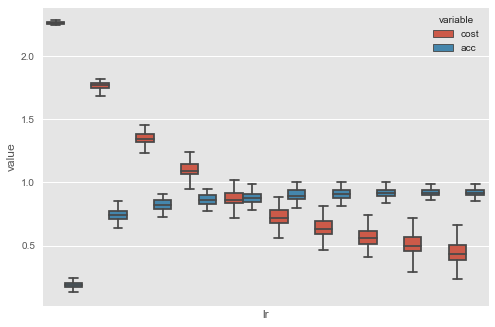

In [46]:
import seaborn as sns
plt.style.use("ggplot")
sns.boxplot(data=df_, x="lr", y="value",hue="variable",showfliers=False).set_xticks([])

We can see that using a higher learning rate seems to correspond to an overal better model as both the distribution of the loss and the accucary improve for higher learning rates. Now im gonna train the model using $\alpha = 0.1$ on the big data set

In [2]:
(xtrain, ytrain), (xval, yval), num_cls = load_mnist(final=True)

100%|██████████| 1200/1200 [01:08<00:00, 17.49it/s]


Text(0.5, 0, 'Epoch')

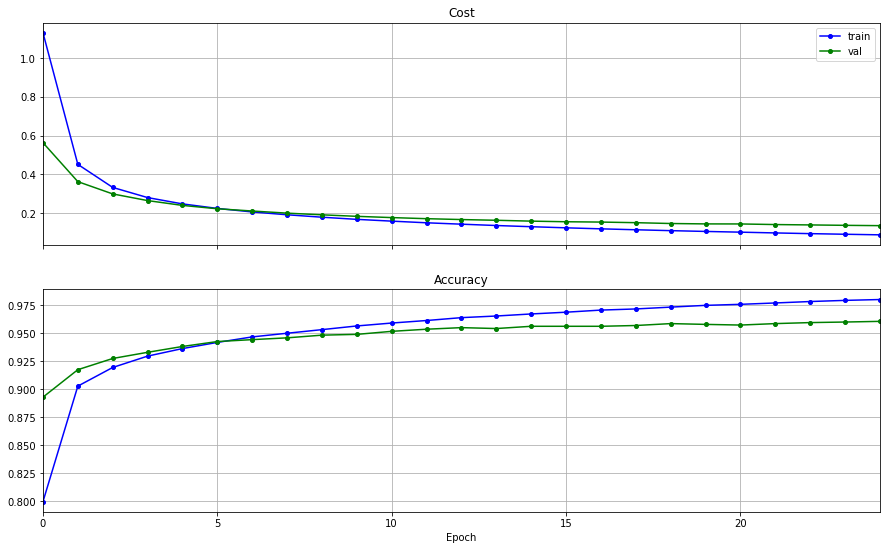

In [5]:
parameters = initialize_parameters()
W1, b1 = parameters["W1"],parameters["b1"]
W2, b2 = parameters["W2"],parameters["b2"]
costs = []
batch_size = 50
lr = 0.1
epochs = 25
N = xtrain.shape[0]
steps = int(N/batch_size)
xtrain_ = xtrain[:steps*batch_size]
ytrain_ = ytrain[:steps*batch_size]
epochs_ = {}
epochs_eval = {}
eval_batches = np.split(xval, int(xval.shape[0]/batch_size))
index = list(range(N))
train_acc = {}
val_acc = {}
for epoch in range(epochs):
    epochs_[epoch] = []
    epochs_eval[epoch] = []
    train_acc[epoch] = []
    val_acc[epoch] = []
    np.random.shuffle(index)
    batches = np.split(np.array(index), steps)
    for batch in tqdm(batches):
        x, y = xtrain_[batch], ytrain_[batch]
        X = x.reshape(batch_size,784,1)
        Y = np.zeros((batch_size,10,1))
        for i in range(len(y)):
            Y[i,y[i],:] = 1.
        A2, cache = forward_propagation(X, parameters, batched=True)
        cost = compute_cost_stable(A2, Y,batched=True)
        grads = backward_propagation(parameters, cache, X, Y,batched=True)
        parameters = update_parameters(parameters, grads, batched=True, learning_rate = lr)
        epochs_[epoch] += [cost]
        train_acc[epoch] += [np.where(A2.argmax(1) == Y.argmax(1))[0].shape[0] / Y.shape[0]]
    eval_batches = np.split(np.array(list(range(xval.shape[0]))), int(xval.shape[0]/batch_size))
    for ev in eval_batches:
        x, y = xval[ev], yval[ev]
        X = x.reshape(batch_size,784,1)
        Y = np.zeros((batch_size,10,1))
        for i in range(len(y)):
            Y[i,y[i],:] = 1.
        pred, ____ = forward_propagation(X, parameters, batched=True)
        cost_ = compute_cost_stable(pred, Y,batched=True)
        val_acc[epoch] += [np.where(pred.argmax(1) == Y.argmax(1))[0].shape[0] / Y.shape[0]]
        epochs_eval[epoch] += [cost_]
fig, axes = plt.subplots(nrows=2,ncols=1, sharex=True,figsize=(15,9))
pd.DataFrame(epochs_).mean(axis=0).plot(style=".-",grid=True,ms=8,color="blue",ax=axes[0])
pd.DataFrame(epochs_eval).mean(axis=0).plot(style=".-",grid=True,ms=8,color="green",ax=axes[0])
pd.DataFrame(train_acc).mean(axis=0).plot(style=".-",grid=True,ms=8,color="blue",ax=axes[1])
pd.DataFrame(val_acc).mean(axis=0).plot(style=".-",grid=True,ms=8,color="green",ax=axes[1])
axes[0].legend(["train","val"])
axes[0].set_title("Cost")
axes[1].set_title("Accuracy")
axes[1].set_xlabel("Epoch")

We can see that the final model trained on the big data set behaves as expected, converging to roughly 96 % accuracy. Notably, the validation loss does not increase dramatically anymore after 15 epochs, while the training loss is obviously still increasing. We can actually continue training for a couple of epochs before we would see the validation metrics to get worse (early stopping), but for now I think 25 Epochs are reasonable.